In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import StrMethodFormatter

dirNS = ['./2d_1024L_64r_ns/0.5/', './2d_1024L_64r_ns/1/', './2d_1024L_64r_ns/2/']
stConNS = ['No structure']

varSimNS = [0.5, 1, 2]
#nseedsNS = 64
lcNS = 0
LNS = 1024

nseedsNS = 64

scalesNS = np.array([1,2,4,8,16,32,64,128,256,512,1024])

linestyle = ['dashed', 'dotted', 'dashdot']
marker = ['^', 'o', 's']
color = ['darkgreen', 'red', 'navy']

In [2]:
### Fine grid values NS ###

kNS = np.array([])
kgNS = np.array([])
varNS = np.array([])
for ivar in range(len(varSimNS)):
    rdir = dirNS[ivar]
    k = np.array([])
    kg = np.array([])
    var = np.array([])
    for iseed in range(nseedsNS):
        aux = np.load(rdir+str(iseed)+'/k.npy').reshape(-1)
        k = np.append(k, np.mean(aux))
        kg = np.append(kg, np.exp(np.mean(np.log(aux))))
        var = np.append(var, np.var(np.log(aux)))
    kNS = np.append(kNS, np.mean(k))
    kgNS = np.append(kgNS, np.mean(kg))
    varNS = np.append(varNS, np.mean(var))
print(kNS, kNS.shape)
print(kgNS, kgNS.shape)
print(varNS, varNS.shape)

[1.28407756 1.64881207 2.7182606 ] (3,)
[1.00001795 1.00002548 1.00003625] (3,)
[0.50005561 1.00011121 2.00022242] (3,)


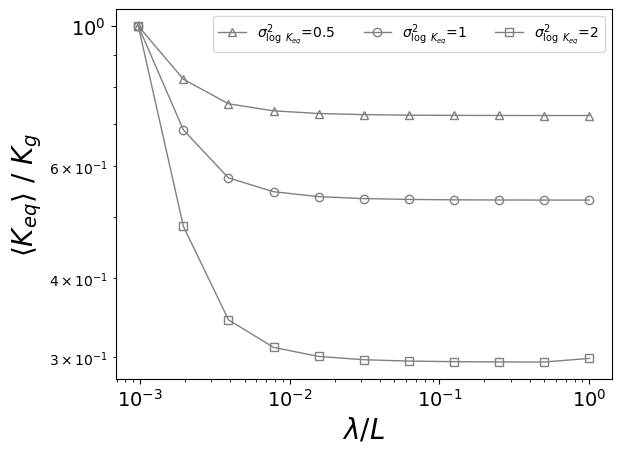

In [3]:
### Arithmetic mean NS ###

for ivar in range(len(varSimNS)):
    rdir = dirNS[ivar]
    keff = np.zeros(len(scalesNS))
    for iscale in range(len(scalesNS)):
        scale = scalesNS[iscale]
        aux = np.array([])
        for iseed in range(nseedsNS):
            if scale == scalesNS[0]:
                aux = kNS[ivar]
            elif scale == scalesNS[-1]:
                aux = np.append(aux, np.loadtxt(rdir+str(iseed)+'/SolverRes.txt')[0])
            else:
                try:
                    aux = np.append(aux, np.load(rdir+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                except:
                    pass
        keff[iscale] = np.nanmean(aux)
        #print(keff)
    plt.loglog(scalesNS/LNS, keff/kNS[ivar], color='gray', marker=marker[ivar], label=r"$\sigma^2_{\log\ K_{eq}}$"+'='+str(varSimNS[ivar]), 
        lw=1, fillstyle='none')
    plt.xlabel(r'$\lambda / L$', fontsize=20)
    plt.ylabel(r'$⟨K_{eq}⟩ \ / \ K_{g}$', fontsize=20)
    plt.tick_params(axis='both', labelsize=14)
    plt.legend(loc='upper right', ncol=3)


In [3]:
conDir = ['./2d_1024L_128r/2dint_128/', './2d_1024L_128r/2dcon_128/', './2d_1024L_128r/2ddis_128/']
varDir = ['0.5/', '2/']#, '5/']#, '7/'] 
stCon = ['ICS', 'HCS', 'LCS']

nseeds = 128
lc = 16
con = [1,2,3]
varSim = [0.5, 1, 2] 
scales = np.array([1,2,4,8,16,32,64,128,256,512,1024]) 

linestyle = ['dashed', 'dotted', 'dashdot']
marker = ['^', 'o', 's', '^']

color = ['darkgreen', 'red', 'navy']
scale_col = ["black","purple","navy","green","red"]

k_FG = np.array([])
kg_FG = np.array([])
var_FG = np.array([])
for icon in range(len(conDir)):
    rdir1 = conDir[icon]
    k = np.array([])
    kg = np.array([])
    var = np.array([])
    for ivar in range(len(varDir)):
        rdir2 = varDir[ivar]
        k1 = np.array([])
        kg1 = np.array([])
        var1 = np.array([])
        for iseed in range(nseeds):
            aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
            k1 = np.append(k1, np.mean(aux))
            kg1 = np.append(kg1, np.exp(np.mean(np.log(aux))))
            var1 = np.append(var1, np.var(np.log(aux)))
            #print(k1, k1.shape)
        k = np.append(k, np.mean(k1))
        kg = np.append(kg, np.mean(kg1))
        var = np.append(var, np.mean(var1))
    k_FG = np.append(k_FG, k)
    kg_FG = np.append(kg_FG, kg)
    var_FG = np.append(var_FG, var)
k_FG = np.reshape(k_FG, (3,len(varDir)))
kg_FG = np.reshape(kg_FG, (3,len(varDir)))
var_FG = np.reshape(var_FG, (3,len(varDir)))
print(k_FG, k_FG.shape)
print(kg_FG, kg_FG.shape)
print(var_FG, var_FG.shape)

[[1.28385046 2.71694494]
 [1.2880463  2.73200151]
 [1.27902685 2.70088972]] (3, 2)
[[1.00076527 1.00163601]
 [1.00380587 1.00774853]
 [0.99632895 0.99279083]] (3, 2)
[[0.49783791 1.99135162]
 [0.49894809 1.99579238]
 [0.49894809 1.99579238]] (3, 2)


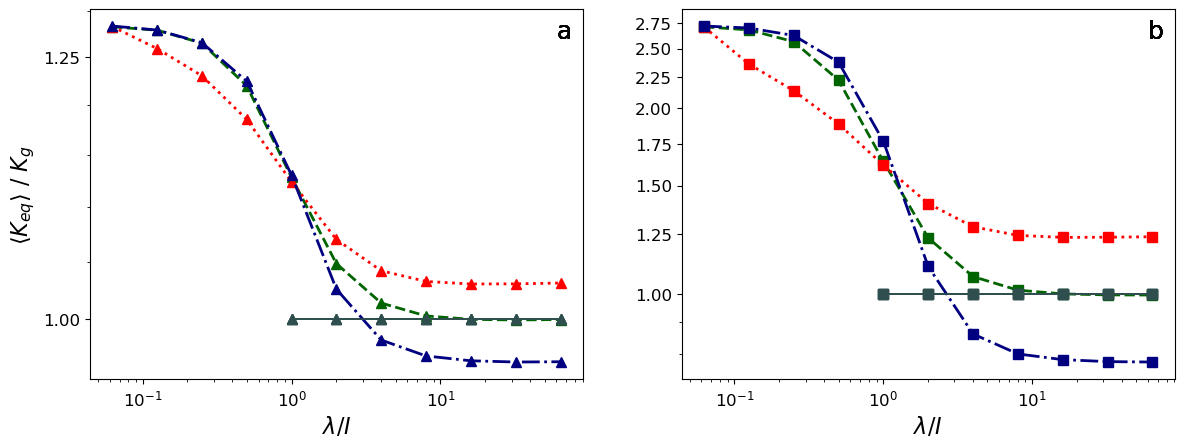

In [4]:

scalesNS =  np.array([16,32,64,128,256,512,1024]) 
NS = np.array([1,1,1,1,1,1,1])

varDir = ['0.5/', '2/']
varSim = [0.5, 2]
#conDir = ['./2d_128/2dint_128/','./2d_128/2dcon_128/', './2d_128/2ddis_128/']
marker = ['^', 's']

num=['a','b']

fig, ax = plt.subplots(1,2)
fig.set_figwidth(14)

for ivar in range(len(varDir)):
    rdir2=varDir[ivar]
    for icon in range(len(conDir)):
        rdir1=conDir[icon]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scale == scales[0]:
                    aux = k_FG[icon][ivar]
                elif scale == scales[-1]:
                    aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
            keff[iscale] = np.mean(aux)
        ax[ivar].loglog(scales/lc, keff/kg_FG[icon][ivar], label=stCon[icon]+', '+r'$\sigma^2_{Y}$'+' = '+str(varSim[ivar]), color=color[icon], 
            marker=marker[ivar],markersize=7, fillstyle='full', linewidth=2, linestyle=linestyle[icon])
        #ax[ivar].set_title(num[ivar], fontsize=16, loc='left', weight='bold')
        #ax[ivar].set_title(r"$\sigma^2_{\log\ K_{eq}}$"+' = '+str(varSim[ivar]), fontsize=16, loc='center')
        #ax[ivar].legend()
        ax[ivar].set_xlabel(r'$\lambda / I$', fontsize=16)
        ax[0].set_ylabel(r'$⟨K_{eq}⟩ \ / \ K_{g}$', fontsize=16)
        ax[ivar].tick_params(labelsize=12)
        ax[ivar].loglog(scalesNS/lc, NS, label='No structure', marker=marker[ivar], color='darkslategray', linewidth=1.25, markersize=7, fillstyle='full')
        
        
        ax[ivar].get_yaxis().set_major_formatter(ScalarFormatter())
        ax[ivar].yaxis.set_minor_formatter(NullFormatter())
        ax[0].set_yticks(ticks=np.arange(1,1.5,0.25), labels=np.arange(1,1.5,0.25))
        ax[0].get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        ax[1].set_yticks(ticks=np.arange(1,3,0.25), labels=np.arange(1,3,0.25))
        ax[1].get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        ax[0].text(60, 1.27, 'a', style='normal', fontsize=18)
        ax[1].text(60, 2.6, 'b', style='normal', fontsize=18)
    #ax[ivar].legend()
